# TODO
* Leitfaden zur Reproduzierung der Slides und Code für
    * Just Code
        Remote: CPU/GPU: Colab
        Remote: CPU only: Blender
        Local: Clone Repo and follow instructions
    * Code with slides:
        Remote: CPU only: Blender
        Local CPU/GPU: Clone repo and follow instructions
* Better CSS for IFIS style slides
    * Have H1 headings on top of screen
    * Have Content starting at fixed height
    * Add a footer with author name and Institute
* Add docker container for repo
    * with nvidia docker
* We need a  leaderboard solution for our challenges
    * check out kaggle. We need custom scoring functions and private challenges
* We need a doodle for weekly date finding
* Certificate: Participation
    * 3/4 small challenges
    * participate at big challenge


# AI Camp 2020 Kickoff

# Agenda
***
1. What to expect
2. Timeline
3. How we code
    * Jupyter Notebooks
    * Google Colab
4. Lecture 1: Python + Keras
5. Challenge 1: Minimal MNIST

# What to expect
***

# Timeline
***
- **KW 16**: (20.04) Kickoff, Intro lecture, Minimal MNIST Competition
    - KW 17: Q&A, optional
- **KW 18**: Reinforcement Learning, Pole Cart Competition
    - KW 19: Q&A, optional
- **KW 20**: Guest lecture: Proc. Kacprowski (Data Science for Biomedicine), **TBD COMP**
    - KW 21: Q&A, optional
- **KW 22**: Comp Recap, NLP Lecture, Sentiment Analysis Competition
    - KW 23: Q&A, optional
- **KW 24: Presentation & selection of our grand competition**
    - KW 25 to 28: Working on our competition
- **KW 29: AI Camp wrap up, presenting the results**

# Regular date
***
We need day + time for our meetings.

Please check our doodle, if you haven't already!

# Organizational
***
 - Lectures & Examples in Python
     - Frameworks: Tensorflow, Pytorch, sklearn, etc.
 - Slides & Code in <a href="https://jupyter.org/">Jupyter Notebooks</a>
 - Everything is located in Niklas' <a href="https://github.com/nikrruun/jupyter-notebooks/tree/aicamp2020">GitHub Repo</a>
     - Branch "aicamp2020"

# Why Jupyter Notebooks?
***
We want to present math and code for AI models
> We have PowerPoint for this!

But wouldn't it be nice, if we also could
- Actually run the code during presentation
- Interact with it and observe changes
- Easily share it and ship to remote hardware
   


# You're in a simulation
***
This presentation is just code + markdown: 

In [ ]:
import time
for i in range(33):
    print(f"2^{i} =", 2**i)
    #time.sleep(0.1)

This is a running python interpreter!

# Features 
***
* Inline Latex support: $e^yx_k\sum_{i=1}{2^{-i}}$
* Text narratives via markdown (essentially a readme.md)
* Usually, a notebook is a list of sequential code or text cells
    - But, with some effort it automatically translates into a slideshow
* Run a copy on <a href="https://colab.research.google.com">Google Colab</a> in < 1 minute
    

# Google Colab walkthrough
***
1. Open the link <a href="https://colab.research.google.com">Google Colab</a>
2. Sign up & in, and open a new notebook
3. Go to tab "GitHub" and search for user "nikrruun". Choose as shown below:
<img src="img/slides/colab_github_menu.png">

# Google Colab (2)
***
4. Click on "<i>kickoff_presentation.ipynb</i>"
    - Generally, Google Colab filters out all available notebooks from a given repository
5. Use the "Content" Navigation (on the left) or scroll down until you see this cell
6. Check if you can run this code cell:

In [ ]:
data = [72, 101, 108, 108, 111, 32, 87, 111, 114, 108, 100]
print("".join([chr(x) for x in data]))

# So, why *python*?
***
Python is the current standard for ML and Data Science frameworks:
* Forced indentation
* Interpreted, not compiled
* Extremely slow

It is possible to expose C/C++/CUDA code to python
* Tons of highly optimized frameworks and libraries exist
    * numpy, tensorflow, pytorch, pycuda ...
* Performance still not perfect, but close
* Interpreted code allows for interactive and explorative programming!

# Important libraries
***
There are a couple of standard tools often used for Data Science in python:
* **numpy**: for fast math and array operations on CPU
* **sklearn**: framework for machine learning pipelines
* **pandas**: data analysis and manipulation framework
* **tensorflow, keras**: Deep learning with gpu support
* **matplotlib**: Data visualization

On your own machine, you will have to manually install them (pip)
* Google Colab comes with all of those pre-installed!

# Lecture 1: Intro Deep Learning
***
In the following, we will
1. Take a look at the problem we would like to solve
2. Learn how to make the computer learn
3. Implement a deep neural network to solve (1.) in keras

Let's start by importing the libraries we will need today:

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


# POV: You are a post office
***
We want to recognize handwritten digits to speed up our letter sorting machine!
* We need an algorithm that takes in an image and gives back an integer
    * We want to *classify* each image into its integer category

Let's load the MNIST dataset. Keras has some built-in functions for that:

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* `x_train`: 60k 28x28 images used for training
* `y_train`: 60k integer labels
* `x_test`: 10k 28x28 images used for testing
* `y_test`: 10k integer labels

What do these images look like? matplotlib shows us how:

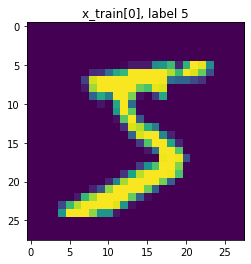

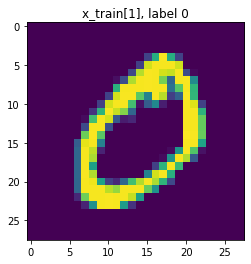

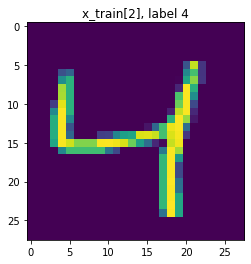

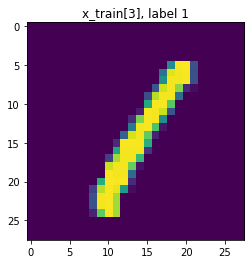

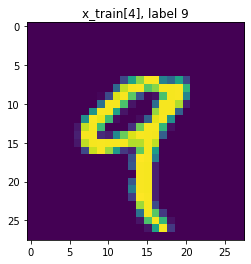

In [4]:
for i in range(5):
    img = x_train[i]
    plt.imshow(img)
    plt.title(f"x_train[{i}], label {y_train[i]}")
    plt.show()

# What is a classifier?
***
What we want is a function $C$, that assigns each image a number between 0 and 9:  
$C: \mathbb{N}_{28\times28}\rightarrow \{0,1,\dots,9\}$

We could also write the images as 1D arrays, row-by-row, so let's also allow  
$C: \mathbb{N}_{784\times1}\rightarrow \{0,1,\dots,9\}$


What about the *quality* of $C$ ?
* We only want the correct assigments/label!

# What we know is what we know
***
If we had perfect knowledge of the correct assignments of $C$
* there wouldn't be any problems
* a simple look-up-table gets it done
    * Or does it?
For pixels we have $x_{ij}\in(0,255)$, i.e. 256 possible values.
* Therefore, there are $256^n$ different images with $n$ pixels
    * $256^{28*28}\approx 1.1485*10^{1888}$
        * We will need over $10^{1876}$ TB to store the lookup table!

Usually, the input domains are just too large to materialize
* Also, where do the labels come from? Hiwis?

# All models are wrong
***
Even if we reduced each image to one-millionth of its size
* We still need over $10^{1870}$ TB of data
    * How does nature do it? (*Visual cortices!*)

Imagine you had to describe to someone what `1` or `0` looked like  
Would you say:
* "Here are all possible images, just learn those by heart"

or
* "One is a vertical line and the other is a circle"


# Concepts for computers
***
For our case, we want a computer capable of *generalization*:
* However, computers don't know about concepts, only about facts

We also don't want to have to explain everything
* Just once, wouldn't it be nice if the computer figured things out on its own?
    * Supervised: By learning from examples
    * Unsupervised: Through its own experiences

* What is the difference between stating all facts or explaining the underlying rules?
* A *relation* can be defined by either
    * Writing down all pairs, i.e. $R=\{(a,b)\mid\dots\}$
    * Write down the *generating process* (Function)

* Example:
    * $f=\{(1,1),(2,4),(3,9),\dots\}$
    * $f(x)=x^2,x\in \mathbb{N}$

If you now feel a vague discomfort thinking about what it means to
   * *know*, *understand* or to *explain*,
then we are good to go!

# Finding patterns
***
Luckily (for you), our immediate problem is less philosophical
   * Neither brain nor PC process infinite sets in finite time
   * We want the *functional notation*!





<span style="color:red">**We only have finite sets!**</span>
* There are infinitely many different functions generating a finite dataset $D$
    * Which one is correct?

# The real world is messy
***
Data is obtained through observation
* E.g. by photography of zipcodes on letters

Observation might interfere with the data
   * Random noise, warping, distortions, ...
    
We want the true, *underlying* function of the data
* A function perfectly generating $D$ repeats the interferences
    * We want $f$ to *generalize* from the faulty data


# Regression
***
Consider the following synthetic dataset:

In [ ]:
def observe(x):
    return x + np.random.rand(*x.shape) * 3

n = 30
X = np.arange(n)
Y = observe(X)
plt.plot(X, Y, "*")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

We are searching for a fitting function
* Get as close as possible to the data, but not too close
* Gut feeling: The simplest model that just gets it done
    * Linear functions, polynomials, ...

Let $f_\theta(x)$ denote our *model*, which we want to fit to our data
* Let $\theta=\{w_0,w_1,\dots\}$ be a set of *parameters* $w_i$ that determine certain characteristics of $f$
    * E.g. the coefficients of a polynomial
    * We might omit explicitly stating $\theta$ for brevity if its clear from context
* $x\in X$ are samples from the observed training data $X$

# Objectives
***
Given $f_\theta(x)$, a dataset $D=(X,Y)$ with
* $X:=$ the training data, e.g. images, obtained through observation
* $Y:=$ the corresponding labels

and a function $L(f_\theta,D)$ implementing a notion of how *closely* $f_\theta$ approximates $D$

Then, we can express our fitting problem as a minimization problem

$\hat{\theta}=\underset{\theta}{argmin}\: L(f_\theta,D)$


# Example: Linear regression
***
Let $f_\theta(x)=w_0x+w_1$ be a linear function of $x$ with slope $w_0$ and y-intercept $w_1$

Which notion $L$ of error/deviation/well-fitting do we want?
* In general: Task-dependent
* Here: Anything reasonable works

Let's say we want the mean of squared differences to be minimized\
$\displaystyle L_{MSE}=\frac{1}{\lvert D \rvert}\sum_{i=0}^{\lvert D \rvert} (f(X_i)-Y_i)^2$


The idea looks like this:

In [ ]:
def f_factory(w0, w1):
    def f(x):
        return w0*x + w1
    return f

f = f_factory(2,-10)
y_pred = f(X)

plt.plot(X, y_pred, label="f")
plt.plot(X,Y,"*", label="Data")
plt.legend()
plt.show()

* `y_pred`: we call this the prediction of our model $f$ on the samples in $X$
    * Think: $y\_pred_i=f_\theta(X_i)$

Our notion of error should measure how far off $f_\theta$ is for each sample

In [ ]:
fplot = plt.plot(X, y_pred, label="f")
data_plot = plt.plot(X,Y,"*", label="Data")
for i in range(len(X)):
    plt.plot([X[i],X[i]],[Y[i],y_pred[i]],"--", 
             color="red", label="Error")
plt.legend(["f","Data","Error"])
plt.show()

We can implement our error like this:

In [ ]:
def LMSE(Y, y_pred):
    return ((y_pred-Y)**2).mean()

y_pred = f(X)
error_f = LMSE(Y, y_pred)
print("L_MSE=",error_f)

Cool, but where is the minimum?

# With brute force
***
Remember, we are looking for those $w_0, w_1$ that minimize $L_{MSE}$.\
How does $L_{MSE}$ look like?
* Let's check for several different values for $w_0, w_1$

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
def get_loss_for_model(w0, w1):
    f = f_factory(w0, w1)
    y_pred = f(X)
    return LMSE(Y,y_pred)

n = 50
w0_range = np.linspace(-5,5,n)
w1_range = np.linspace(-5,5,n)

w0_grid, w1_grid = np.meshgrid(w0_range, w1_range)
loss_grid = np.zeros((n,n),"float32")
for i in range(n):
    for j in range(n):
        loss_grid[i,j]=get_loss_for_model(w0_grid[i,j], w1_grid[i,j])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(w0_grid, w1_grid, loss_grid, cmap="coolwarm")
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.set_zlabel("LMSE")
plt.title("Loss surface linear regression model")
plt.show()

# Mathematical optimization
***
A research area solely dedicated to finding optimal parameters
* There are tons of different problem classes
    * Discrete, linear, non-linear, integer, convex ...
        * There are multiple lectures on each of the subfields @TU BS!
* There are even more methods to solve or approximate them
    * Bisection, simplex, ant colony optimization, gradient descent and many more

For didactic reasons: **Gradient descent**


# Reality check
***
Our example is extremely simplistic
* One-dimensional dataset (MNIST has 784)
* Only a few samples (MNIST has 60k)
* At most two-dimensional model & loss
    * State-of-the-art language models have billions of parameters and training samples

The restrictions are only for illustration!
* Who wants 784 dimensional plots?
* The methods are the same

# The curse of dimensionality
***
Let $\lvert\theta\rvert$ be the number of parameters for a model
* Let's say we want to check $n$ points for each parameter
    * This leads to $n^{\lvert\theta\rvert}$ different model parametrizations
    * We will need to evaluate the loss $n^{\lvert\theta\rvert}$ times!


Our grid-based approach has exponential complexity!
* In practice, you can't just plot the loss function and spot the optimum
    * We won't know how $L$ looks like
* A more efficient approach is needed

# Iterative methods
***
The idea of iterative methods goes as follows:
1. Initialize a first set of parameters, called $\theta_0$
    * Could be random or a good guess
2. Evaluate the loss achieved with $\theta_0$, called $L_0 = L(f_{\theta_0},D)$
3. Do
    * Parameter update: $\theta_{k+1}\leftarrow SEARCH(\theta_k)$
    * Loss update: $L_{k+1} = L(f_{\theta_k+1},D)$
4. Until $L_k\approx L_{k+1}$ (Or any other convergence or stopping criterion) 

# Gradient descent
***
Local search based on derivatives of the loss function w.r.t. to the parameters

$\frac{dL}{d\theta}$ expresses how changing $\theta$ affects the value of $L$
* If $\frac{dL}{d\theta}<0$, then there exists a $h$ with
    * $L(f_{\theta-h},D)<L(f_{\theta},D)$\
    (Follows from the fundamental theorem of calculus)

If the derivative is negative, there is at least one step $h$ that we can take to obtain a smaller $L$!
* If it is positive, the same is true for $-\frac{dL}{d\theta}$

# Gradient descent: Sketch
***
The iterative method would look like this:

3. At iteration $k$, do
    * Compute gradient $\nabla L(\theta_k)=\frac{dL({f_{\theta}},D)}{d\theta}(\theta_k)$
        * Now, we know about the slope of $L$ at $\theta_k$
    * Update $\theta_{k+1}\leftarrow\theta_k-h*\nabla L(\theta_k)$



# What the $h$?
***
Finding an exact $h$ is not trivial for arbitrary functions
* It's simple for certain functions, e.g. convex losses
    * But not for non-convex and non-linear ones

* In practice, somewhat crude heuristics are used for $h$
    * E.g. just using a *small enough* factor that *will probably not break anything*
        * Usually called the **learning rate**

Let's make an example in the following slides

# Gradient descent applied
***
For a short while, lets fix $w_1=0$, given $f(x)=w_0x + w_1$
* This reduces the dimensionality of our minimization problem
    * There is now only one parameter to tune (and to plot)

In [ ]:
%matplotlib inline
n = 50
w0_range = np.linspace(-5,5,n)
w1 = 0

losses = np.zeros(n, "float32")
for i in range(n):
    losses[i]=get_loss_for_model(w0_range[i], w1)

plt.plot(w0_range, losses, label="Loss")
plt.plot(w0_range[1], losses[1], ".", ms=10, label="You are here")
plt.xlabel("$w_0$")
plt.ylabel("LMSE")
plt.legend()
plt.title(f"Loss surface linear regression model ($w_1={w1}$)")
plt.show()

# The loss gradient
***
The derivative for $L_{MSE}$ is pretty simple:\
$\displaystyle\frac{dL_{MSE}}{dw_0}= \frac{d}{dw_0}\frac{1}{\lvert D \rvert}\sum_{i=0}^{\lvert D \rvert}  (f_{w_0}(X_i)-Y_i)^2$

$f$ is the only term depending on $w_0$:\
$\displaystyle\frac{dL_{MSE}}{dw_0}= \frac{1}{\lvert D \rvert}\sum_{i=0}^{\lvert D \rvert} 2(f_{w_0}(X_i)-Y_i) \frac{df}{dw_0}$

Remember: $f_{w_0}(x)=w_0*x$, since we fixed $w_1=0$. So $\frac{df}{dw_0}=x$ and\
$\displaystyle\frac{dL_{MSE}}{dw_0}= \frac{1}{\lvert D \rvert}\sum_{i=0}^{\lvert D \rvert} 2X_i(f_{w_0}(X_i)-Y_i)$


# The loss gradient visualized
***
We can directly implement the gradient and plot it:

In [ ]:
def LMSE_grad_w0(w0, w1, X, Y):
    f = f_factory(w0, w1)
    return (2*X*(f(X)-Y)).mean()

grads_w0 = np.array([LMSE_grad_w0(w0, w1, X, Y) for w0 in w0_range])

plt.plot(w0_range, losses, label="Loss")
plt.plot(w0_range[3], losses[3], ".", ms=10, label="You are here")
plt.plot(w0_range, grads_w0, label="Loss grad $w_0$")
plt.xlabel("$w_0$")
plt.ylabel("LMSE")
plt.legend()
plt.title(f"Loss surface linear regression model ($w_1={w1}$)")
plt.show()

In [ ]:
w0 = -5
w1 = 0
h = 0.001 # aka the learning rate!
steps = 10
w_h = np.zeros(steps,"float32") # history over steps
grad_h = np.zeros(steps,"float32")
loss_h = np.zeros(steps, "float32")

for i in range(steps):
    grad = LMSE_grad_w0(w0, w1, X, Y)
    loss = get_loss_for_model(w0, w1) # loss update
    w_h[i] = w0; grad_h[i] = grad; loss_h[i] = loss

    w0 = w0 - h * grad # parameter update
    # w0 = w0 - np.clip(h*grad, -0.1,0.1)

plt.figure(figsize=(10,10))
plt.plot(w0_range, losses, label="Loss")
plt.plot(w_h, loss_h,"--", marker="*", label="Gradient steps")
plt.legend()
plt.xlabel("$w_0$")
plt.ylabel("$L_{MSE}$")
plt.show()

# Visualizing the model
***
Here is the last model we found:

In [ ]:
plt.figure(figsize=(6,6))
f_final = f_factory(w0, w1)
y_pred = f_final(X)
final_err = LMSE(Y, y_pred)
plt.plot(X, y_pred, label="Our model")
plt.plot(X,Y,"*", label="Data", color="orange")
plt.title(f"Model error: {final_err:.3f}")
plt.legend()
plt.show()

# Congratulations!
***
You just trained a neural network using gradient descent!

**See you all next week :)**

Joke.

It is the simplest possible network with trivial training data!
* The model is linear and there are even direct solutions to find the optimal $\theta$

We'll get to the real stuff in just a bit

# Higher dimensions
***
Let's try to add back our second parameter $w_1$ which we fixed to $0$ in the previous examples

Remember the method:
* Compute gradient $\nabla L(\theta_k)=\frac{dL({f_{\theta}},D)}{d\theta}(\theta_k)$
* Update $\theta_{k+1}\leftarrow\theta_k-h*\nabla L(\theta_k)$

All we need is the partial derivative $\displaystyle\frac{dL_{MSE}}{dw_1}$

# The loss gradient for $w_1$
***
It is even simpler this time:\
$\displaystyle\frac{dL_{MSE}}{dw_1}= \frac{1}{\lvert D \rvert}\sum_{i=0}^{\lvert D \rvert} \frac{df}{dw_1}2(f_{\theta}(X_i)-Y_i) $

Remember: $f_{\theta}(x)=w_0*x+w_1$. So $\frac{df}{dw_1}=1$ and\
$\displaystyle\frac{dL_{MSE}}{dw_1}= \frac{1}{\lvert D \rvert}\sum_{i=0}^{\lvert D \rvert} 2*(f_{\theta}(X_i)-Y_i)$


In [ ]:
def LMSE_grad_w1(w0, w1, X, Y):
    f = f_factory(w0, w1)
    return (2*(f(X)-Y)).mean()

In [ ]:
# %matplotlib notebook
w0 = -5
w1 = -4
lr = 0.001
steps = 10
w0_h, w1_h, loss_h, grad_w1_h, grad_w0_h = \
    [np.zeros(steps,"float32") for i in range(5)]

for i in range(steps):
    grad_w0 = LMSE_grad_w0(w0, w1, X, Y)
    grad_w1 = LMSE_grad_w1(w0, w1, X, Y)
    loss = get_loss_for_model(w0, w1) # loss update
    w0_h[i] = w0; w1_h[i] = w1; loss_h[i] = loss
    grad_w1_h[i] = grad_w1; grad_w0_h[i] = grad_w0

    w0 = w0 - lr * grad_w0
    w1 = w1 - lr * grad_w1
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot(w0_h, w1_h, loss_h, marker="*", color="red")
ax.plot_surface(w0_grid, w1_grid, loss_grid, cmap="coolwarm", 
                alpha=0.7)
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.set_zlabel("LMSE")
plt.title(f"Last error: {loss_h[-1]:.3f}")
plt.show()

# Why isn't $w_1$ changing that much?
***
Take a look at the gradient histories$:

In [ ]:
plt.plot(grad_w0_h, label="Gradient for $w_0$")
plt.plot(grad_w1_h, label="Gradient for $w_1$")
plt.xlabel("Iteration")
plt.legend()
plt.show()

In our implementation, the changes to the $w_i$ are directly proportional to the gradients
* There are several options to fix that
    * E.g. have a minimum step size\
Can you come up with a solution?

# Leaving convex world
***
Our $L_{MSE}$ is a convex function
* Each local optimium is also a global optimum

What happens if we try to find the minimum of a non-linear function?

In [ ]:
def rastrigin_1d(x):
    return 10+x**2 - 10*np.cos(2*np.pi*x)
def rastrigin_1d_grad(x):
    return 2*(x+10*np.pi*np.sin(2*np.pi*x))

w0_range = np.linspace(-10,10,1000)
rastr = rastrigin_1d(w0_range)
plt.plot(w0_range, rastr)
plt.title("Rastrigin 1D")
plt.show()

In [ ]:
w0 = -7.6
lr = 0.001 # try 0.0115
steps = 100
w_h = np.zeros(steps,"float32") # history over steps
grad_h = np.zeros(steps,"float32")
loss_h = np.zeros(steps, "float32")

for i in range(steps):
    grad = rastrigin_1d_grad(w0)
    loss = rastrigin_1d(w0)
    w_h[i] = w0; grad_h[i] = grad; loss_h[i] = loss

    w0 = w0 - lr * grad # parameter update
    #w0 = w0 - np.clip(h*grad, -0.3,0.3)

plt.figure(figsize=(10,10))
plt.plot(w0_range, rastr, label="Rastrigin 1D")
plt.plot(w_h, loss_h,"--", marker="*", label="Gradient steps")
plt.legend()
plt.xlabel("$w_0$")
plt.ylabel("y")
plt.show()
plt.plot(loss_h)
plt.title("Loss history"); 
plt.xlabel("Iteration")
plt.show()

# Summing up
***
Vanilla gradient descent gets stuck in local optima
* Many extensions exist to *mitigate* this
    * The **learning rate** controls the step size of the method
    * But still, it remains a **heuristic** for non-convex functions

On the plus side
* It can be applied to any differentiable function
    * With arbitrary dimensionality
        * We can fit any differentiable model!
* It requires few function evaluations
    * In our context, that means few runs over the dataset!
        * Very important property, since datasets tend to become rather large

# 10 Minute break
***
...and then finally we'll talk about neural networks

# Towards artificial neural networks
***
So far, we learned about
* Linear regression: Fitting a linear model to a set of data points
* Loss functions: A notion of how close a model fits our data
* Gradient descent: A method to find (local) optima
    * We applied this to find better suited parameters for our linear model

These topics weren't chosen randomly, since they prepared you for artificial neural networks:
* Linear regression is a very special case of neural network
    * A single layer, a single neuron and linear activation function
* Loss functions and gradient descent are the standard method to train deep nets
    * Backpropagation is just a method to efficiently obtain the gradients we talked about earlier


# Biological neurons
***
<img src="https://upload.wikimedia.org/wikipedia/commons/3/36/Components_of_neuron.jpg" style="width: 50%;">

# A simplified biological model
***
A biological neuron could be broken down to
* Dendrites, which receive incoming signals from other neurons
    * There is also some sort of *synaptic strength* that weighs the connections
* A cell body (soma), where all incoming signals are accumulated
    * If some *excitation threshold* is reached, the neuron *fires a signal*
* Axons, which pass outgoing signals to the dendrites of other neurons


# A simplified artificial model
***
We need to:
1. Gather all inputs to a neuron
2. Attach a weight associated to each input
3. Accumulate all inputs, i.e. sum them up
4. Compute the excitation strength
5. Set our own output signal

In [ ]:
x_least, err, rank, s = np.linalg.lstsq(X.reshape(-1,1),Y.reshape(-1,1), rcond=-1)
x_least = x_least.squeeze()
plt.plot(X*x_least, label=f"x={x_least:.3f}")
plt.plot(X,Y,"*", label="Data")
plt.legend()
plt.show()

In [ ]:
plt.plot(X,D,"-", label="Perfect fit")
plt.plot(X,D,"*", label="Data")
plt.legend()
plt.show()

* Neural networks are a regression method
    * Why layers? --> reductionism perspective, abstractions, generalization, etc
    * Backprop?, Autodiff, chain rule

    $argmin_{\theta}(C(X) - Y)^2$
    

In [ ]:
import numpy as np
from tensorflow.keras.layers import (
    Dense, Input, Dropout    
)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.losses import Huber
from tensorflow import keras

import gym

In [ ]:
def episode(env, model, render=False, max_steps=None):
    states = []
    action_probs = []
    est_rewards = []
    rewards = []

    state = env.reset()
    i = 0
    while i < (j := max_steps if max_steps is not None else np.inf):
        if render: 
            env.render()
        state = tf.convert_to_tensor(state)
        state = tf.expand_dims(state, 0)
        states.append(state)

        a_p, e_w = model(state)
        action = np.random.choice(env.action_space.n, p=np.squeeze(a_p))
        state, reward, done, info = env.step(action)

        action_probs.append(a_p[0, action])
        est_rewards.append(e_w[0,0])
        rewards.append(reward)

        i += 1
        if done:
            break
    env.close()
    return states, rewards, action_probs, est_rewards

In [ ]:
epochs = 1000
gamma = 0.9
train_max_steps = 200
validation_every = 5
validation_episodes = 5
validation_max_steps = 200
env = gym.make('CartPole-v0').unwrapped
#env = gym.make('MountainCar-v0').unwrapped

critic_loss_func = keras.losses.Huber()

input_layer = Input(env.observation_space.shape)
l = Dense(128, "relu")(input_layer)
l = Dense(64, "relu")(l)
actor = Dense(env.action_space.n, "softmax", name="actor")(l)
critic = Dense(1, name="critic")(l)
model = Model(input_layer, [actor, critic])

model.summary()
opt = keras.optimizers.Adam(lr=0.01)
reward_history = []

In [ ]:
for epoch in range(epochs):

    with tf.GradientTape() as tape:
        states, rewards, action_probs, est_rewards = episode(env, model, False, train_max_steps)
        reward_history.append(sum(rewards))

        returns = []
        discounted_sum = 0
        for r in rewards[::-1]:
            discounted_sum = r + gamma * discounted_sum
            returns.insert(0, discounted_sum)
        returns = np.array(returns)
        returns = (returns - returns.mean()) / returns.std()

        critic_labels = tf.convert_to_tensor(returns, "float32")

        # critic_loss = critic_loss_func(est_rewards, critic_labels)
        cl = []
        for f,g in zip(est_rewards, critic_labels):
            cl.append(critic_loss_func(tf.expand_dims(f,0), tf.expand_dims(g,0)))
        critic_loss = sum(cl)

        al = -tf.math.log(action_probs) * (critic_labels - est_rewards)
        actor_loss = sum(al)
        loss = actor_loss + critic_loss

        gradients = tape.gradient(loss, model.trainable_weights)
        opt.apply_gradients(zip(gradients, model.trainable_weights))

    if epoch % validation_every == 0:
        val_rewards = []
        for val_e in range(validation_episodes):
            states, rewards, action_probs, est_rewards = episode(env, model, False, validation_max_steps)
            val_rewards.append(sum(rewards))
        val_rewards = np.array(val_rewards)
        print(f"Epoch {epoch}/{epochs}",np.mean(reward_history),  val_rewards.min(), val_rewards.max(), val_rewards.mean())
        reward_history.clear()
        #episode(env, model, True, validation_max_steps)
        pass